<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/Linear_Regression_Boston_Housing4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s




In [206]:
data = pd.read_csv("/content/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [207]:
# COVERTING THE COLUMN HEADING TO CAPITAL
data.columns = data.columns.str.upper()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [208]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

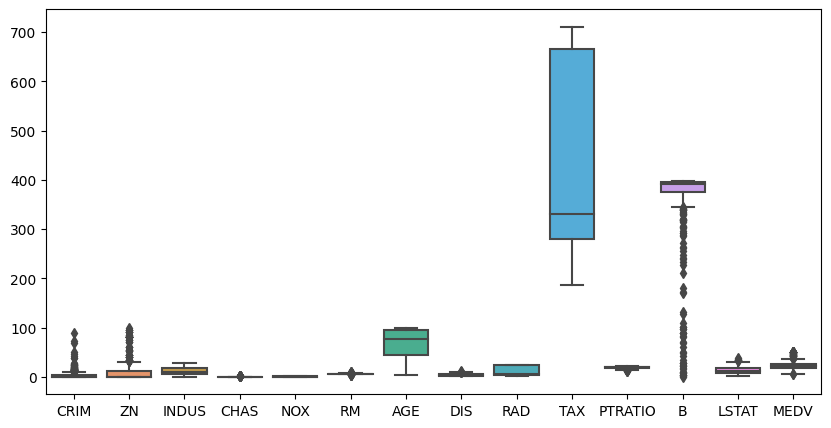

In [209]:
# EVALUATION OF RELATION AMONG VARIOUS COLUMNS
plt.figure(figsize=[10,5])
sns.boxplot(data = data)

<ipython-input-210-90cda4db06c3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'], bins=30)


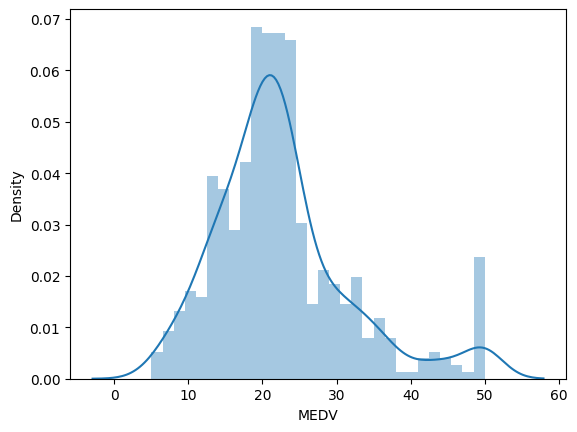

In [210]:
# plt.figure(figsize = [10, 6])
sns.distplot(data['MEDV'], bins=30)
plt.show()

<Axes: >

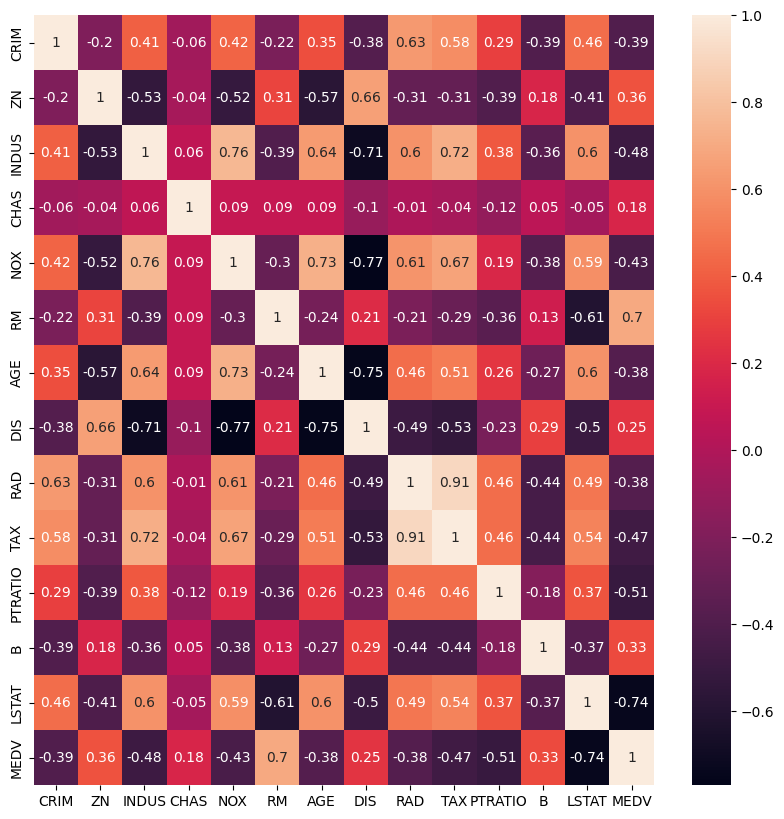

In [211]:
plt.figure(figsize=[10,10])
corr_mtrx=data.corr().round(2)
sns.heatmap(data=corr_mtrx,annot = True)

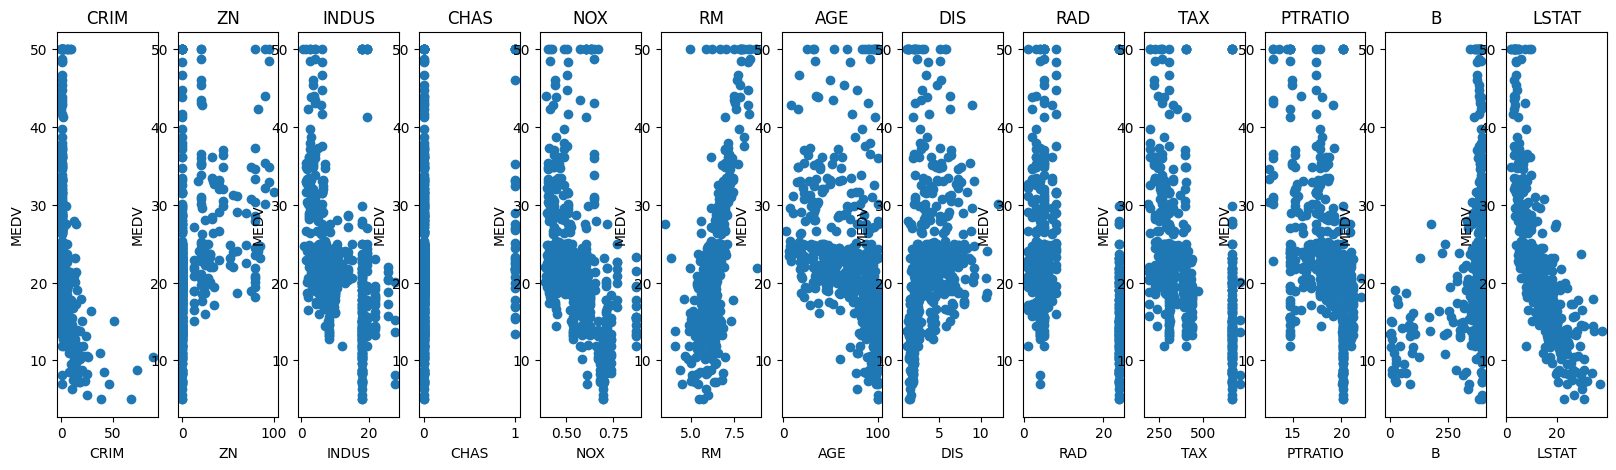

In [212]:
plt.figure(figsize=[20,5])
cols = ['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE', 'DIS',	'RAD',	'TAX',	'PTRATIO',	'B'	,'LSTAT']
target = data['MEDV']
for i, j in enumerate(cols):
 plt.subplot(1,len(cols),i+1)
 x = data[j]
 y = target
 plt.scatter(x,y)
 plt.title(j)
 plt.xlabel(j)
 plt.ylabel('MEDV')

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [214]:
input = data.drop('MEDV',axis=1)
output = data['MEDV']

In [215]:
 # TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size = 0.2, random_state=7)
print(input_train.shape)
print(input_test.shape)
print(output_train.shape)
print(output_test.shape) 

(404, 13)
(102, 13)
(404,)
(102,)


In [216]:
  # MODEL SELECTION AND TRAINING
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(input_train,output_train)

LinearRegression()

In [217]:
print("The coefficient are :",lin_reg.coef_)
print("The intercept is :",lin_reg.intercept_)

The coefficient are : [-1.24649091e-01  3.04735052e-02  2.17990089e-02  2.79225761e+00
 -1.52135247e+01  5.27249266e+00 -1.10577742e-02 -1.27320872e+00
  2.65804711e-01 -1.15043029e-02 -9.19571148e-01  1.01624292e-02
 -3.89712044e-01]
The intercept is : 23.55424546759189


In [218]:
y_pred_train = lin_reg.predict(input_train)

In [219]:
np.array(output_train)

array([20.6, 16.4, 22. , 17.2, 13.5, 23.3, 26.2, 19.7, 13.1, 23.9, 18.2,
       19.3,  7. , 18.5, 13.8, 33.4, 12.6, 19.6, 20.8, 25. , 21.7, 43.8,
       13.4, 34.9, 24.5, 26.6, 36.5, 31.1, 22.6, 20.3, 18.4, 28.7, 23.1,
       17.6, 35.4, 31.6,  8.5, 22.2, 10.4, 22.8, 23.9, 22.2, 32.9, 15.6,
       29.8, 14.3, 28.4, 21.4, 23.1, 10.4, 20.1, 14.4, 14.9, 10.2, 20.8,
       50. , 23.3, 25. , 23.7, 11.9, 23.9, 20.6, 23.8, 32. ,  8.3, 22.5,
       37.2,  8.4, 23.4, 13.1, 17.8, 50. , 29.1, 19.4, 11.7, 30.1, 27.5,
       26.7, 33.2, 33.1, 17.8, 19.9, 50. , 50. , 20. , 22.5, 21. ,  7. ,
        8.8, 19.8, 23.1, 23.4, 32.4, 20.1, 22.4, 42.8, 23.1, 16.1, 22. ,
       23.6, 10.9, 14. , 29.1, 18.6, 36. , 22.6, 17.4, 24.3, 41.3, 24.2,
       18.4, 45.4, 21.2, 50. , 27.5, 16.5, 22.9, 18.6, 20.1, 41.7, 20.2,
       24.6, 10.5, 13.6, 35.4, 32.2, 13.4, 25. , 13.5, 36.2, 26.4, 21.5,
       22.5, 23.3, 27.9, 50. , 28.6, 38.7, 24. , 12.5, 16.1, 17. , 20.5,
       18.7, 17.1, 32.7, 19.1, 19.8, 21.2, 20.6, 16

In [220]:
# Model Evaluation for train data
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("The mean_absolute_error of model is : ",mean_absolute_error(output_train,y_pred_train))
print("The mean_absolute_percentage_error of model is : ",mean_absolute_percentage_error(output_train,y_pred_train))
print("The mean_squared_error of model is : ",mean_squared_error(output_train,y_pred_train))
print("The r2_score of model is : ",r2_score(output_train,y_pred_train))
print("The root_mean_square_error of model is : ",np.sqrt(mean_absolute_error(output_train,y_pred_train)))

The mean_absolute_error of model is :  3.1063004281279722
The mean_absolute_percentage_error of model is :  0.1607253839772132
The mean_squared_error of model is :  19.638717311375427
The r2_score of model is :  0.7698532963729757
The root_mean_square_error of model is :  1.7624699793551015


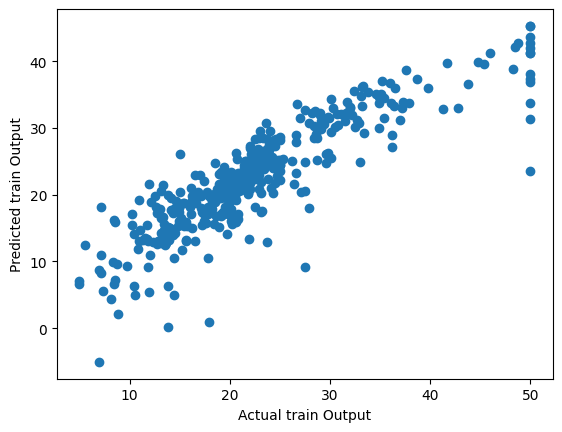

In [221]:
plt.scatter(output_train,y_pred_train)
plt.xlabel('Actual train Output')
plt.ylabel('Predicted train Output')
plt.show()

In [222]:
input_train["Medv_actual"] = output_train
input_train["Medv_predicted_train"] = y_pred_train
input_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv_actual,Medv_predicted_train
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6,15.982374
460,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4,19.867146
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0,21.729553
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2,15.461373
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94,13.5,12.526402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0,20.903830
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,21.907393
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9,13.213182
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3,36.215238


In [223]:
# FOR TEST SET 
y_pred_test = lin_reg.predict(input_test)

In [224]:
# Model Evaluation for test data
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("The mean_absolute_error of model is : ",mean_absolute_error(output_test,y_pred_test))
print("The mean_absolute_percentage_error of model is : ",mean_absolute_percentage_error(output_test,y_pred_test))
print("The mean_squared_error of model is : ",mean_squared_error(output_test,y_pred_test))
print("The r2_score of model is : ",r2_score(output_test,y_pred_test))
print("The root_mean_square_error of model is : ",np.sqrt(mean_absolute_error(output_test,y_pred_test)))

The mean_absolute_error of model is :  3.7807629091749733
The mean_absolute_percentage_error of model is :  0.1861137426539973
The mean_squared_error of model is :  34.056481348874726
The r2_score of model is :  0.5785415472763393
The root_mean_square_error of model is :  1.9444183986927746


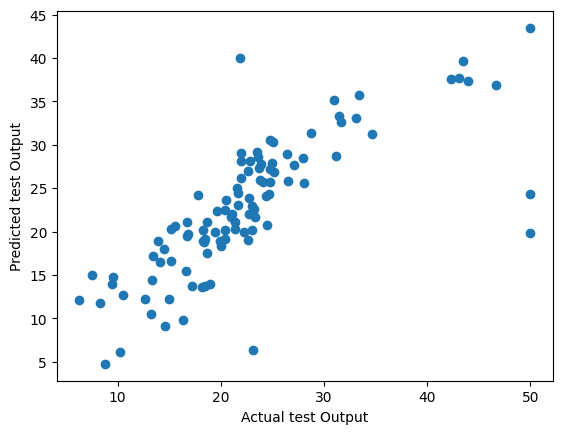

In [225]:
plt.scatter(output_test,y_pred_test)
plt.xlabel('Actual test Output')
plt.ylabel('Predicted test Output')
plt.show()

In [226]:
input_test["Medv_actual"] = output_test
input_test["Medv_predicted_train"] = y_pred_test

input_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv_actual,Medv_predicted_train
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7,23.016076
337,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,18.5,19.175452
327,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,19.931333
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,19.192223
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8,4.733661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.65580,0.0,18.10,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3,9.805358
408,7.40389,0.0,18.10,0,0.597,5.617,97.9,1.4547,24,666,20.2,314.64,26.40,17.2,13.675562
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29,28.0,28.487892
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666,20.2,355.29,17.73,15.2,20.270360
